In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd


# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
html_soup = soup(html, 'html.parser')

In [2]:
table = html_soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [3]:
#Id = Temperature_soup.find_all("th")
#for id in Id:
 #   print(Id.text)
    

headerRow = table.find_all('th')
headers = [cell.text for cell in headerRow]
headers
    

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [4]:
dataRows = table.find_all('tr', class_="data-row")
data = []
for row in dataRows:
    rowData = row.find_all('td')
    data.append([cell.text for cell in rowData])
data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [5]:
Mars_temp_df = pd.DataFrame(data, columns= headers)
Mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
Mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [7]:
Mars_temp_df['id'] = pd.to_numeric(Mars_temp_df['id'])
Mars_temp_df['terrestrial_date'] = pd.to_datetime(Mars_temp_df['terrestrial_date'])
Mars_temp_df['sol'] = pd.to_numeric(Mars_temp_df['sol'])
Mars_temp_df['ls'] = pd.to_numeric(Mars_temp_df['ls'])
Mars_temp_df['month'] = pd.to_numeric(Mars_temp_df['month'])
Mars_temp_df['min_temp'] = pd.to_numeric(Mars_temp_df['min_temp'])
Mars_temp_df['pressure'] = pd.to_numeric(Mars_temp_df['pressure'])

In [8]:
Mars_temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [9]:
Mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
#How many months exist on Mars = 24 months

In [12]:
Mars_temp_df['terrestrial_date'].value_counts()

2012-08-16    1
2016-05-10    1
2016-05-23    1
2016-05-22    1
2016-05-21    1
             ..
2014-07-24    1
2014-07-23    1
2014-07-22    1
2014-07-21    1
2018-02-27    1
Name: terrestrial_date, Length: 1867, dtype: int64

In [13]:
How many Martian days worth of data exist = 1867 days

SyntaxError: invalid syntax (2874134614.py, line 1)

In [14]:
Ave_temp = Mars_temp_df.groupby(['month']).mean().reset_index().loc[:,['month','min_temp']]
Ave_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


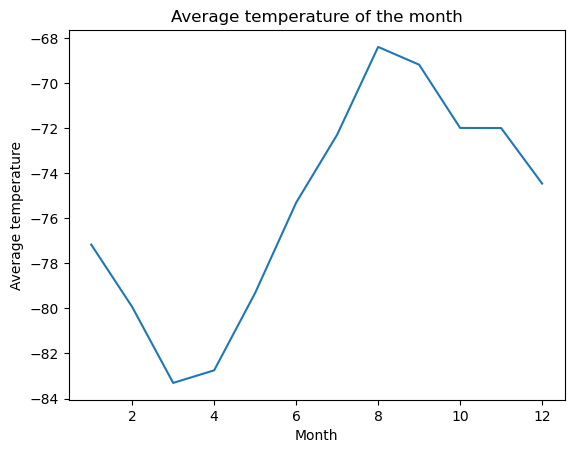

In [15]:
import matplotlib.pyplot as plt 

x = Ave_temp['month']
y = Ave_temp['min_temp'] 
plt.plot(x, y) 
    

plt.xlabel('Month') 

plt.ylabel('Average temperature') 
    

plt.title('Average temperature of the month') 
    

plt.show() 

In [16]:
# coldest month of the year in mars
coldest_month = Ave_temp[Ave_temp.min_temp == Ave_temp.min_temp.min()]
coldest_month

,month,min_temp
2,3,-83.307292


In [17]:
# warmest month of the year in mars
warmest_month = Ave_temp[Ave_temp.min_temp == Ave_temp.min_temp.max()]
warmest_month

,month,min_temp
7,8,-68.382979


In [18]:
Ave_pressure = Mars_temp_df.groupby(['month']).mean().reset_index().loc[:,['month','pressure']]
Ave_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


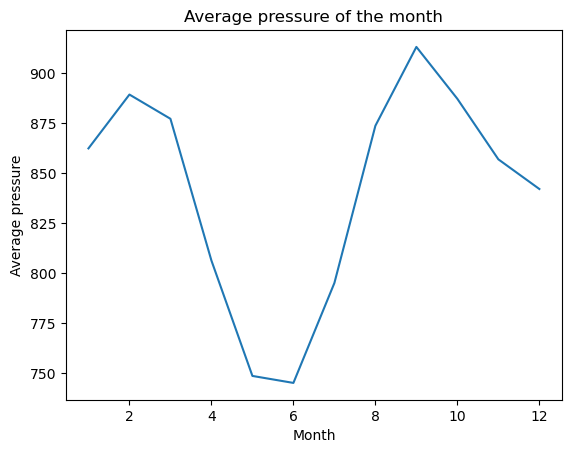

In [19]:
x = Ave_pressure['month']
y = Ave_pressure['pressure'] 
plt.plot(x, y) 
plt.xlabel('Month') 
plt.ylabel('Average pressure') 
plt.title('Average pressure of the month') 
    
plt.show() 

In [20]:
# lowest atmospheric pressure on Mars
lowest_pressure= Ave_pressure[Ave_pressure.pressure == Ave_pressure.pressure.min()]
lowest_pressure

,month,pressure
5,6,745.054422


In [21]:
# highest atmospheric pressure on Mars
lowest_pressure= Ave_pressure[Ave_pressure.pressure == Ave_pressure.pressure.max()]
lowest_pressure

,month,pressure
8,9,913.30597


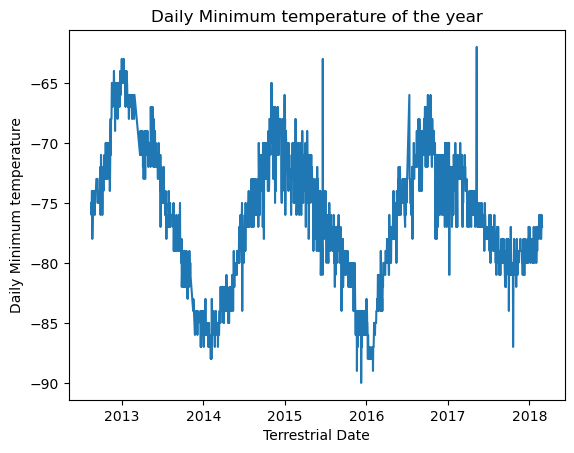

In [22]:
x = Mars_temp_df['terrestrial_date']
y = Mars_temp_df['min_temp'] 
plt.plot(x, y) 
    

plt.xlabel('Terrestrial Date') 

plt.ylabel('Daily Minimum temperature') 
    

plt.title('Daily Minimum temperature of the year') 
    

plt.show() 

In [23]:
Mars_temp_df.to_csv('Mars.csv',index = False)